## Importing Libraries

In [15]:
#pip install scipy
#pip install lazypredict
#pip install scikit-learn

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier
from scipy.stats import spearmanr

## Importing the "On-Time" Dataset

In [17]:
mydf = pd.read_csv('C:/Users/Hiroo/Downloads/Campus/Year 3/Semester 2/ST 3082 - Statistical Learning I/Final Project/Train new.csv', encoding='latin-1')

In [18]:
df = mydf.copy()

In [19]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [20]:
df.shape

(10999, 12)

In [21]:
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


### Dropping Columns

In [23]:
df.drop(columns=['ID'], inplace=True)

### Convert Ordinal Numerical Variables into Strings

In [24]:
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


In [25]:
# Converting 'Customer_rating' and 'Reached.on.Time_Y.N' columns to strings
df['Customer_rating'] = df['Customer_rating'].astype(str)
df['Reached.on.Time_Y.N'] = df['Reached.on.Time_Y.N'].astype(str)

### Recoding Variables 

In [26]:
def Prior_purchases(x):
    if x<=2:
        return 'low'
    elif x==3:
        return 'medium'
    elif x>=4:
        return 'high'
    else:
        return x

df['Prior_purchases'] = df['Prior_purchases'].apply(lambda x: Prior_purchases(x))
df['Prior_purchases'].value_counts()




Prior_purchases
high      4445
medium    3955
low       2599
Name: count, dtype: int64

In [27]:
def Customer_care_calls(x):
    if x<=3:
        return 'low'
    elif x==4:
        return 'medium'
    elif x>=5:
        return 'high'
    else:
        return x

df['Customer_care_calls'] = df['Customer_care_calls'].apply(lambda x: Customer_care_calls(x))
df['Customer_care_calls'].value_counts()

Customer_care_calls
low       3855
high      3587
medium    3557
Name: count, dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  object
 3   Customer_rating      10999 non-null  object
 4   Cost_of_the_Product  10999 non-null  int64 
 5   Prior_purchases      10999 non-null  object
 6   Product_importance   10999 non-null  object
 7   Gender               10999 non-null  object
 8   Discount_offered     10999 non-null  int64 
 9   Weight_in_gms        10999 non-null  int64 
 10  Reached.on.Time_Y.N  10999 non-null  object
dtypes: int64(3), object(8)
memory usage: 945.4+ KB


### Detecting Outliers

In [29]:
categorical_columns = df.select_dtypes(include=['object']).columns

# Define a threshold for what you consider an outlier in terms of frequency
frequency_threshold = 5  # Or choose a percentage of total occurrences

for column in categorical_columns:
    print(f"\nAnalyzing outliers in '{column}'")
    # Calculate the frequency of each category
    frequency = df[column].value_counts()
    # Identify categories with a frequency below the threshold
    outliers = frequency[frequency < frequency_threshold].index.tolist()
    
    if outliers:
        print(f"Outliers in {column}: {outliers}")
    else:
        print(f"No outliers detected in {column}")


Analyzing outliers in 'Warehouse_block'
No outliers detected in Warehouse_block

Analyzing outliers in 'Mode_of_Shipment'
No outliers detected in Mode_of_Shipment

Analyzing outliers in 'Customer_care_calls'
No outliers detected in Customer_care_calls

Analyzing outliers in 'Customer_rating'
No outliers detected in Customer_rating

Analyzing outliers in 'Prior_purchases'
No outliers detected in Prior_purchases

Analyzing outliers in 'Product_importance'
No outliers detected in Product_importance

Analyzing outliers in 'Gender'
No outliers detected in Gender

Analyzing outliers in 'Reached.on.Time_Y.N'
No outliers detected in Reached.on.Time_Y.N


In [30]:
from scipy import stats

numerical_columns = df.select_dtypes(include=['int64']).columns

# Define threshold for outlier detection (e.g., Z-score greater than 3)
z_score_threshold = 3

# Dictionary to store the number of outliers for each numerical variable
outlier_counts = {}

# Detect outliers for each numerical variable and count them
for column in numerical_columns:
    z_scores = stats.zscore(df[column])
    outliers_count = sum(abs(z_scores) > z_score_threshold)
    outlier_counts[column] = outliers_count

print("Number of outliers for each numerical variable using Z-scores:")
print(outlier_counts)

Number of outliers for each numerical variable using Z-scores:
{'Cost_of_the_Product': 0, 'Discount_offered': 181, 'Weight_in_gms': 0}


#### Correlation Between Numerical Variables

<Axes: >

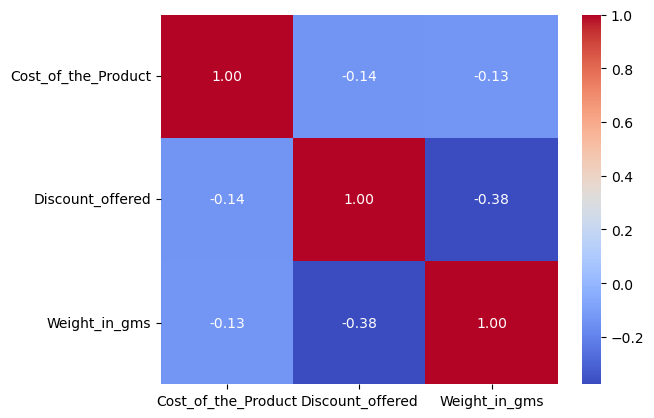

In [31]:
# Assuming 'df' is your DataFrame
numeric_cols = df.select_dtypes(include=[np.number]).columns
numeric_df = df[numeric_cols]

# Compute correlation matrix using Spearman's rank correlation
correlation_matrix = numeric_df.corr()

# Create a heatmap plot of the Spearman's rank correlation matrix:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

In [32]:
print(df['Warehouse_block'].value_counts())
print(df['Mode_of_Shipment'].value_counts())	

Warehouse_block
F    3666
D    1834
A    1833
B    1833
C    1833
Name: count, dtype: int64
Mode_of_Shipment
Ship      7462
Flight    1777
Road      1760
Name: count, dtype: int64


## Splitting into Training and Testing

In [33]:
X = df.drop('Reached.on.Time_Y.N', axis=1)
y = df['Reached.on.Time_Y.N']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Print the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (8799, 10) (8799,)
Testing set shape: (2200, 10) (2200,)


In [34]:
print(X_train.shape)

(8799, 10)


In [35]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8799 entries, 8077 to 5327
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      8799 non-null   object
 1   Mode_of_Shipment     8799 non-null   object
 2   Customer_care_calls  8799 non-null   object
 3   Customer_rating      8799 non-null   object
 4   Cost_of_the_Product  8799 non-null   int64 
 5   Prior_purchases      8799 non-null   object
 6   Product_importance   8799 non-null   object
 7   Gender               8799 non-null   object
 8   Discount_offered     8799 non-null   int64 
 9   Weight_in_gms        8799 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 756.2+ KB


## Encoding (y_train) Customer_rating Target Variable

you typically do not include your target variable in the preprocessing pipeline designed for your features. In scikit-learn pipelines, especially the ColumnTransformer and Pipeline objects, the focus is on transforming the feature matrix 
�
X. The target variable 
�
y is usually treated separately and often does not require the same preprocessing steps as the input features.

However, there are scenarios where you might need to preprocess the target variable. This is common in regression tasks where the distribution of the target variable might be skewed. Techniques like log transformation can help normalize the distribution, which can be beneficial for model performance and prediction accuracy. In such cases, you would handle the target variable transformation outside the main feature preprocessing pipeline.





Including the target variable—especially an ordinal one—directly within the same preprocessing pipeline as your features (the one that includes transformations like scaling, encoding, etc., for your input features 
�
X) is not standard practice in scikit-learn workflows. The main preprocessing pipeline is typically designed to transform feature data (
�
X) and not the target variable (
�
y). This separation is due to the different roles these elements play in the modeling process: 
�
X is what you use to make predictions, and 
�
y is what you're predicting.

However, preprocessing the target variable (
�
y) is sometimes necessary, particularly when dealing with regression tasks (e.g., log transformation of a skewed target) or when specific formats are required by the algorithm (e.g., converting classes to integers for some types of classifiers). For ordinal targets in classification tasks, ensuring that the target variable is appropriately encoded is important. But typically, this preprocessing of 
�
y is handled separately from the ColumnTransformer or Pipeline used for 
�
X.

Handling an Ordinal Target Variable
If your target variable is ordinal and you're working on a classification task, you might need to ensure it's properly encoded as numerical labels that respect the ordinal nature. This could involve manually encoding the categories to integers that reflect their order, or using an OrdinalEncoder in a preprocessing step specifically for 
�
y, separate from your main feature preprocessing pipeline.

In [22]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Define the ordinal categories and their corresponding numerical values
ordinal_categories = ['0', '1']  # Define the order of categories

# Fit the LabelEncoder using the ordinal categories
label_encoder.fit(ordinal_categories)

# Transform the ordinal variable into numerical labels
y_train_encoded = label_encoder.transform(y_train)


In [23]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit LabelEncoder on y_train and transform y_train
y_train_encoded = label_encoder.fit_transform(y_train)

# Now, y_train_encoded will contain numerical labels

In [24]:
import numpy as np

# Check for missing values in the encoded target variable
missing_values = np.isnan(y_train_encoded).sum()

# Check if there are any missing values
if missing_values == 0:
    print("No missing values found in the encoded target variable.")
else:
    print("Missing values found in the encoded target variable.")

No missing values found in the encoded target variable.


## Comparing Models

In [36]:
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,medium,2,177,medium,low,F,44,1233,1
1,F,Flight,medium,5,216,low,low,M,59,3088,1
2,A,Flight,low,2,183,high,low,M,48,3374,1
3,B,Flight,low,3,176,high,medium,M,10,1177,1
4,C,Flight,low,2,184,medium,medium,F,46,2484,1


### Comparing Models

In [37]:
# 1. Import necessary libraries
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [27]:
# Instantiate LazyClassifier
clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Display models and their performance
print(models)

  0%|          | 0/29 [00:00<?, ?it/s]

100%|██████████| 29/29 [00:31<00:00,  1.07s/it]

[LightGBM] [Info] Number of positive: 5232, number of negative: 3567
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000801 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 584
[LightGBM] [Info] Number of data points in the train set: 8799, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594613 -> initscore=0.383069
[LightGBM] [Info] Start training from score 0.383069
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
SVC                                0.67               0.69     0.69      0.67   
GaussianNB                         0.63               0.69      NaN      0.62   
NearestCentroid                    0.66               0.69     0.69      0.66   
AdaBoostClassifier                 0.66    

## Pipeline - Pre-processor

In [46]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


# Define your variables by their type
numerical_cols = ['Cost_of_the_Product', 'Weight_in_gms']
numerical_colswoutliers = ['Discount_offered']
categorical_cols = ['Warehouse_block','Mode_of_Shipment','Gender']
ordinal_cols = ['Product_importance', 'Customer_care_calls', 'Prior_purchases', 'Customer_rating']

# Define the order for your ordinal data as required by OrdinalEncoder
ordinal_categories = [['low', 'medium', 'high'], ['low', 'medium', 'high'], ['low', 'medium', 'high'], ['1','2','3','4','5']]

# Define transformers for numerical, categorical, and ordinal features
numerical_transformer = StandardScaler()
numerical_transformerwoutliers = RobustScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
ordinal_transformer = OrdinalEncoder(categories=ordinal_categories)

# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('numout', numerical_transformerwoutliers, numerical_colswoutliers),
        ('cat', categorical_transformer, categorical_cols),
        ('ord', ordinal_transformer, ordinal_cols)
    ]
)

## Random Forest

Can encode y_train to predict and then inverse the predictions to check accuravy. But here we decided to go thru not encoding y_train because it just makes it more complex.

In [29]:
# Define the pipeline including the preprocessor and Random Forest classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

# Define parameters grid for GridSearchCV
param_grid = {
    'classifier__n_estimators': [100, 200, 300],  # Number of trees in the forest
    'classifier__max_depth': [None, 10, 20],  # Maximum depth of the tree
    'classifier__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'classifier__min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Perform grid search to find the best parameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Evaluate the model on the train set
y_predtrain = best_model.predict(X_train)

trainaccuracy = accuracy_score(y_train, y_predtrain)
print("Train Accuracy:", trainaccuracy)

trainf1 = f1_score(y_train, y_predtrain, average='weighted')
print("Train F1 Score:", trainf1)


# Evaluate the model on the test set
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 300}
Best Score: 0.6805323918548762
Train Accuracy: 0.7829298783952722
Train F1 Score: 0.7830175620959738
Test Accuracy: 0.6654545454545454
F1 Score: 0.663915020553676


## Gradient Boosting Model (Best Performance)

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

# Define pipeline including preprocessor and Gradient Boosting model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingClassifier())
])

In [32]:
# Create GradientBoostingClassifier instance
gb_classifier = GradientBoostingClassifier()

# Create pipeline with preprocessor and classifier
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', gb_classifier)])

# Define parameter grid for GradientBoostingClassifier
param_grid = {
    'classifier__n_estimators': [100, 200, 300],  # Number of boosting stages
    'classifier__max_depth': [3, 5, 7],  # Maximum depth of the individual regression estimators
    'classifier__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'classifier__min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Perform grid search to find the best parameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Use the best estimator to make predictions on test data
best_estimator = grid_search.best_estimator_


# Evaluate the model on the train set
y_predtrain = best_estimator.predict(X_train)

trainaccuracy = accuracy_score(y_train, y_predtrain)
print("Train Accuracy:", trainaccuracy)

trainf1 = f1_score(y_train, y_predtrain, average='weighted')
print("Train F1 Score:", trainf1)


# Evaluate the model on the test set
y_pred = best_estimator.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'classifier__max_depth': 3, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Best Score: 0.6807590831567524
Train Accuracy: 0.7120127287191726
Train F1 Score: 0.7096726330083719
Test Accuracy: 0.6754545454545454
F1 Score: 0.6732743360636009


### GB Model with best parameters

In [47]:
from sklearn.ensemble import GradientBoostingClassifier

# Extracting the best parameters from the grid search
best_params = {
    'max_depth': 3,
    'min_samples_leaf': 4,
    'min_samples_split': 2,
    'n_estimators': 100
}

from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.compose import ColumnTransformer

# Assuming 'preprocessor' is your ColumnTransformer
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(**best_params))
])

# Fit the pipeline with the training data
pipeline.fit(X_train, y_train)

# Predict the labels on the validation/test dataset
y_pred = pipeline.predict(X_test)

# Calculate F1 score - using the 'average' parameter to handle multi-class settings if necessary
f1 = f1_score(y_test, y_pred, average='macro')  # You can change 'macro' to 'binary' if it's a binary classification

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the scores
print("F1 Score: {:.2f}".format(f1))
print("Accuracy: {:.2f}%".format(accuracy * 100))

F1 Score: 0.68
Accuracy: 67.55%


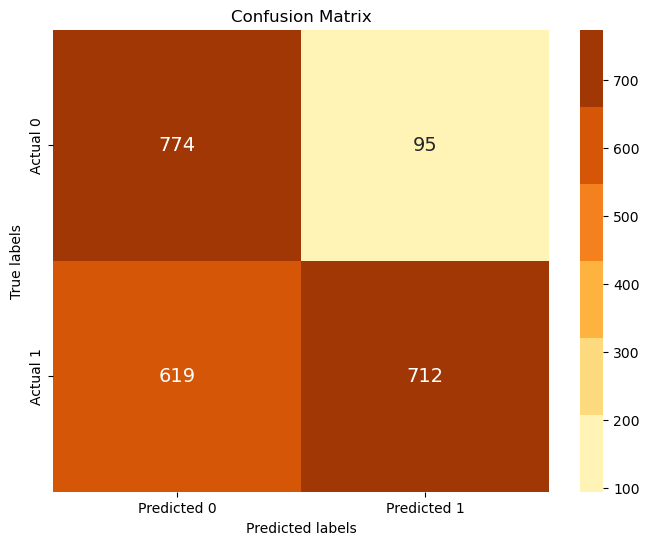

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming model is your trained gradient boosting model
# And X_test contains the features of your test set, and y_test contains the true labels
# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap with yellow and orange colors
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap=sns.color_palette("YlOrBr"), fmt='d', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'], annot_kws={"fontsize": 14})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### Feature Importance

In [41]:
# Extract feature importances from the classifier
feature_importances = pipeline.named_steps['classifier'].feature_importances_

# Attempt to get feature names directly from the preprocessor
try:
    feature_names = preprocessor.get_feature_names_out()
except AttributeError:  # Fallback if 'get_feature_names_out' is not available
    # You might need to construct feature names manually depending on your preprocessing
    feature_names = [f"feature_{i}" for i in range(len(feature_importances))]

# Combine feature names and their importances
features_and_importances = sorted(zip(feature_names, feature_importances), key=lambda x: x[1], reverse=True)

# Display the feature importances
print("Feature Importances:")
for feature, importance in features_and_importances:
    print(f"{feature}: {importance}")

Feature Importances:
numout__Discount_offered: 0.7426791246705314
num__Weight_in_gms: 0.14468748706238269
ord__Prior_purchases: 0.04929404162568399
num__Cost_of_the_Product: 0.043640445245437996
ord__Customer_rating: 0.004459142903548102
ord__Product_importance: 0.004412239714608492
ord__Customer_care_calls: 0.003566661623005756
cat__Warehouse_block_C: 0.0015857060613167174
cat__Warehouse_block_D: 0.001146790889128228
cat__Warehouse_block_F: 0.0011211964410568962
cat__Mode_of_Shipment_Ship: 0.0008756190276387605
cat__Warehouse_block_B: 0.0007974520348824341
cat__Gender_F: 0.000666604886069499
cat__Mode_of_Shipment_Road: 0.0006205061549940677
cat__Warehouse_block_A: 0.0002562083078949732
cat__Mode_of_Shipment_Flight: 0.00019077335181970126
cat__Gender_M: 3.186366816168131e-16


### Permutation Importance

Text(0.5, 0, 'Permutation Importance')

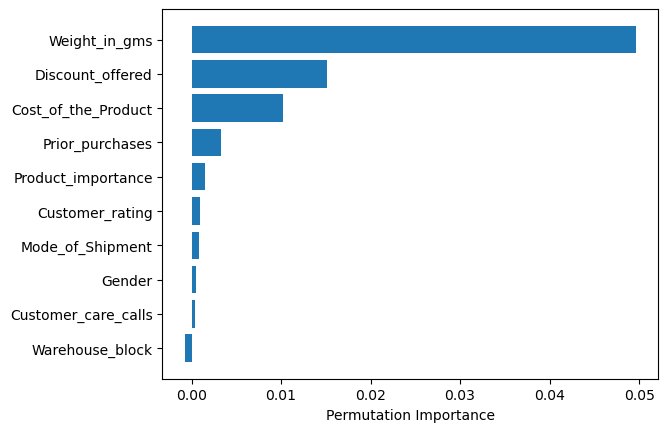

In [49]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
%matplotlib inline

perm_importance = permutation_importance(pipeline, X_test, y_test)

feature_names = X_train.columns
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

### Fitting Model with Reduced Variables

In [58]:
# Define your variables by their type
numerical_cols = ['Cost_of_the_Product', 'Weight_in_gms']
numerical_colswoutliers = ['Discount_offered'] #Removeed 
#Removed categorical_cols = ['Warehouse_block','Mode_of_Shipment','Gender']
ordinal_cols = ['Prior_purchases', 'Product_importance'] #Removeed 'Customer_care_calls','Customer_rating',

# Define the order for your ordinal data as required by OrdinalEncoder
ordinal_categories = [['low', 'medium', 'high'], ['low', 'medium', 'high']] #['1','2','3','4','5'], 

# Define transformers for numerical, categorical, and ordinal features
numerical_transformer = StandardScaler()
numerical_transformerwoutliers = RobustScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
ordinal_transformer = OrdinalEncoder(categories=ordinal_categories)

# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('numout', numerical_transformerwoutliers, numerical_colswoutliers),
        ('cat', categorical_transformer, categorical_cols),
        ('ord', ordinal_transformer, ordinal_cols)
    ]
)

In [59]:
from sklearn.ensemble import GradientBoostingClassifier

# Define pipeline including preprocessor and Gradient Boosting model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingClassifier())
])

# Create GradientBoostingClassifier instance
gb_classifier = GradientBoostingClassifier()

# Create pipeline with preprocessor and classifier
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', gb_classifier)])

# Define parameter grid for GradientBoostingClassifier
param_grid = {
    'classifier__n_estimators': [100, 200, 300],  # Number of boosting stages
    'classifier__max_depth': [3, 5, 7],  # Maximum depth of the individual regression estimators
    'classifier__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'classifier__min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Perform grid search to find the best parameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Use the best estimator to make predictions on test data
best_estimator = grid_search.best_estimator_


# Evaluate the model on the train set
y_predtrain = best_estimator.predict(X_train)

trainaccuracy = accuracy_score(y_train, y_predtrain)
print("Train Accuracy:", trainaccuracy)

trainf1 = f1_score(y_train, y_predtrain, average='weighted')
print("Train F1 Score:", trainf1)


# Evaluate the model on the test set
y_pred = best_estimator.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'classifier__max_depth': 3, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 100}
Best Score: 0.6805322626492325
Train Accuracy: 0.7137174678940789
Train F1 Score: 0.7112796775654281
Test Accuracy: 0.6790909090909091
F1 Score: 0.6774670256254216


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'classifier__max_depth': 3, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 100}
Best Score: 0.6805322626492325
Train Accuracy: 0.7137174678940789
Train F1 Score: 0.7112796775654281
Test Accuracy: 0.6790909090909091
F1 Score: 0.6774670256254216

## XG Boost

In [ ]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from xgboost import XGBClassifier

# Create a Random Forest classifier
xgb_model = XGBClassifier(enable_categorical=True)

# Create the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', xgb_model)])

param_grid = {
    'classifier__n_estimators': [100, 150],
    'classifier__max_depth': [10, 20],
    'classifier__min_child_weight': [10, 15],
    'classifier__gamma': [0.3, 0.4, 0.5],
    'classifier__learning_rate': [0.25, 0.1],
    'classifier__reg_lambda': [5, 10],
    'classifier__reg_alpha': [1, 5],
}

# Perform grid search to find the best parameters
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train_encoded)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Use the best estimator to make predictions on test data
best_estimator = grid_search.best_estimator_

# Evaluate the model on the train set
y_predtrainnum = best_estimator.predict(X_train)

# Convert y_pred to strings
y_predtrain = y_predtrainnum.astype(str)

trainaccuracy = accuracy_score(y_train, y_predtrain)
print("Train Accuracy:", trainaccuracy)

trainf1 = f1_score(y_train, y_predtrain, average='weighted')
print("Train F1 Score:", trainf1)


# Evaluate the model on the test set
y_prednum = best_estimator.predict(X_test)

# Convert y_pred to strings
y_pred = y_prednum.astype(str)

accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

Best Parameters: {'classifier__gamma': 0.5, 'classifier__learning_rate': 0.25, 'classifier__max_depth': 20, 'classifier__min_child_weight': 15, 'classifier__n_estimators': 100, 'classifier__reg_alpha': 5, 'classifier__reg_lambda': 10}
Best Score: 0.6829191229703175
Train Accuracy: 0.719399931810433
Train F1 Score: 0.7184413878619894
Test Accuracy: 0.6645454545454546
F1 Score: 0.6642183102956672


## SVC

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

# Define the SVC model
svc_model = SVC()

# Create pipeline with preprocessor and SVC classifier
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', svc_model)])

# Define parameter grid for SVC
param_grid = {
    'classifier__C': [0.1, 1, 10],  # Regularization parameter
    'classifier__kernel': ['linear', 'poly', 'rbf'],  # Kernel type
    'classifier__gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf' and 'poly'
}

# Perform grid search to find the best parameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Use the best estimator to make predictions on test data
best_estimator = grid_search.best_estimator_

# Evaluate the model on the train set
y_predtrain = best_estimator.predict(X_train)

trainaccuracy = accuracy_score(y_train, y_predtrain)
print("Train Accuracy:", trainaccuracy)

trainf1 = f1_score(y_train, y_predtrain, average='weighted')
print("Train F1 Score:", trainf1)


# Evaluate the model on the test set
y_pred = best_estimator.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters: {'classifier__C': 1, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}
Best Score: 0.6706453175874721
Train Accuracy: 0.6825775656324582
Train F1 Score: 0.6742880868245849
Test Accuracy: 0.6631818181818182
F1 Score: 0.6550274679498981


## Clustering (K-Prototypes)

In [ ]:
from kmodes.kprototypes import KPrototypes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Define your variables by their type
numerical_cols = ['Cost_of_the_Product', 'Weight_in_gms', 'Discount_offered']
categorical_cols = ['Warehouse_block', 'Mode_of_Shipment', 'Gender']
ordinal_cols = ['Product_importance', 'Customer_care_calls', 'Prior_purchases', 'Customer_rating','Reached.on.Time_Y.N']

# Define the order for your ordinal data as required by OrdinalEncoder
ordinal_categories = [['low', 'medium', 'high'], ['low', 'medium', 'high'], ['low', 'medium', 'high'], ['1', '2', '3', '4', '5'], ['0', '1']]

# Preprocess categorical columns
categorical_data = pd.get_dummies(df[categorical_cols], drop_first=True)

# Preprocess ordinal columns
ordinal_data = df[ordinal_cols].copy()
ordinal_data['Product_importance'] = ordinal_data['Product_importance'].map({'low': 0, 'medium': 1, 'high': 2})
ordinal_data['Customer_care_calls'] = ordinal_data['Customer_care_calls'].map({'low': 0, 'medium': 1, 'high': 2})
ordinal_data['Prior_purchases'] = ordinal_data['Prior_purchases'].map({'low': 0, 'medium': 1, 'high': 2})
ordinal_data['Customer_rating'] = ordinal_data['Customer_rating'].astype(int) - 1  # To match 0-indexed categories
ordinal_data['Reached.on.Time_Y.N'] = ordinal_data['Reached.on.Time_Y.N'].astype(int)

# Concatenate numerical, categorical, and ordinal data
processed_data = pd.concat([df[numerical_cols], categorical_data, ordinal_data], axis=1)


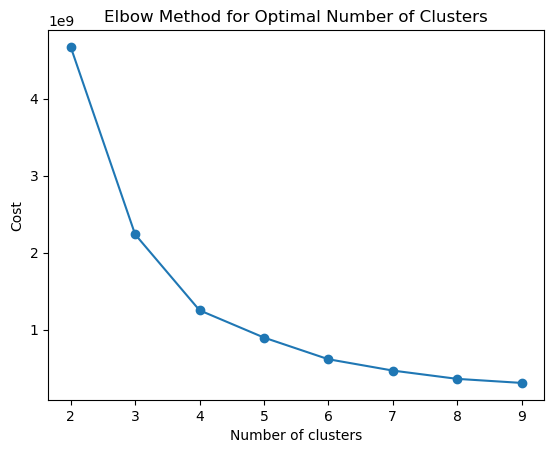

In [ ]:
######### Dont Do Run This Code Again (Because takes 30 min)
######### Dont Do Run This Code Again (Because takes 30 min)
######### Dont Do Run This Code Again (Because takes 30 min)
######### Dont Do Run This Code Again (Because takes 30 min)
######### Dont Do Run This Code Again (Because takes 30 min)
######### Dont Do Run This Code Again (Because takes 30 min)

# Assuming 'processed_data' is the DataFrame prepared by your existing code
range_n_clusters = range(2, 10)  # Adjust this range based on your specific needs

# Compute costs for elbow method
costs = []

for n_clusters in range_n_clusters:
    kproto = KPrototypes(n_clusters=n_clusters, init='Huang', n_init=10, verbose=0, random_state=42)
    kproto.fit(processed_data, categorical=[i for i in range(len(numerical_cols), processed_data.shape[1])])
    costs.append(kproto.cost_)

# Plot elbow method
plt.plot(range_n_clusters, costs, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

For n_clusters = 2, the silhouette score is 0.7334037810827554.
For n_clusters = 3, the silhouette score is 0.6321048991583545.
For n_clusters = 4, the silhouette score is 0.6200479463614762.
For n_clusters = 5, the silhouette score is 0.5839604342033718.
For n_clusters = 6, the silhouette score is 0.5467085421147574.
For n_clusters = 7, the silhouette score is 0.5481150060894898.
For n_clusters = 8, the silhouette score is 0.5403280355774703.
For n_clusters = 9, the silhouette score is 0.5174518688598079.


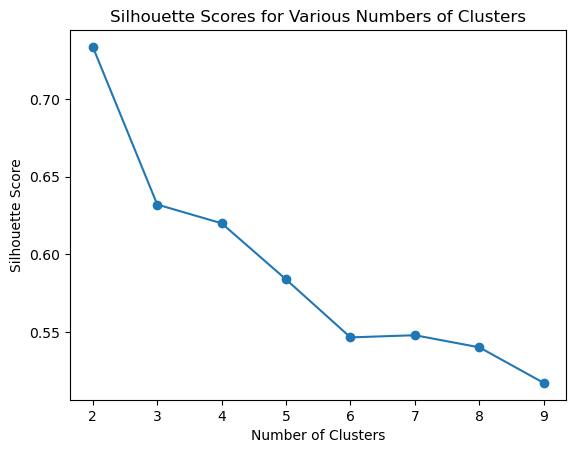

Best number of clusters by silhouette score is: 2


In [ ]:
######### Dont Do Run This Code Again (Because takes 30 min)
######### Dont Do Run This Code Again (Because takes 30 min)
######### Dont Do Run This Code Again (Because takes 30 min)
######### Dont Do Run This Code Again (Because takes 30 min)
######### Dont Do Run This Code Again (Because takes 30 min)
######### Dont Do Run This Code Again (Because takes 30 min)

from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

# Assuming 'processed_data' is the DataFrame prepared by your existing code
range_n_clusters = range(2, 10)  # Adjust this range based on your specific needs

# Compute silhouette scores for a range of cluster numbers
silhouette_scores = []
for n_clusters in range_n_clusters:
    kproto = KPrototypes(n_clusters=n_clusters, init='Huang', n_init=10, random_state=42)
    cluster_labels = kproto.fit_predict(processed_data, categorical=[i for i in range(len(numerical_cols), processed_data.shape[1])])
    silhouette_avg = silhouette_score(processed_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the silhouette score is {silhouette_avg}.")

# Plot silhouette scores
plt.figure()
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Various Numbers of Clusters')
plt.show()

# Determine the best number of clusters
best_n_clusters = range_n_clusters[np.argmax(silhouette_scores)]
print(f"Best number of clusters by silhouette score is: {best_n_clusters}")



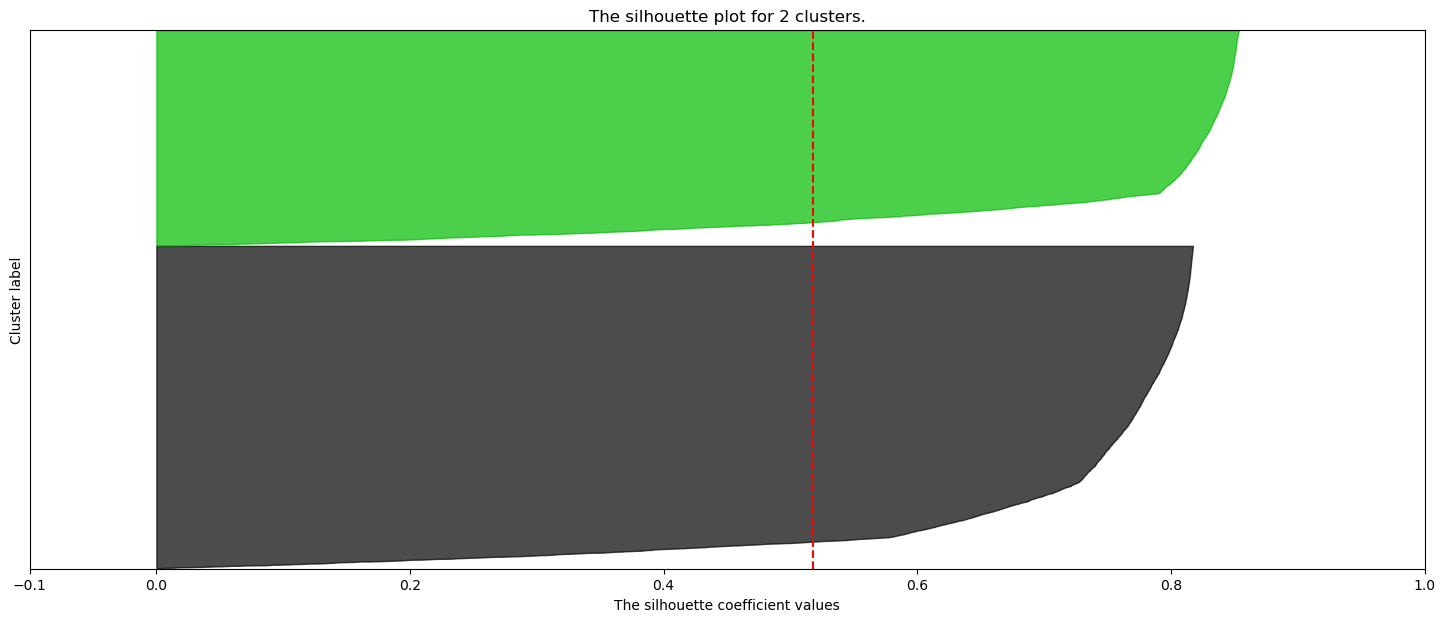

In [ ]:
best_n_clusters=2

# Re-run KPrototypes with the best number of clusters and plot silhouette diagram
kproto = KPrototypes(n_clusters=best_n_clusters, init='Huang', n_init=10, random_state=42)
cluster_labels = kproto.fit_predict(processed_data, categorical=[i for i in range(len(numerical_cols), processed_data.shape[1])])

# Create a silhouette plot
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(processed_data) + (best_n_clusters + 1) * 10])

silhouette_vals = silhouette_samples(processed_data, cluster_labels)
y_lower = 10
for i in range(best_n_clusters):
    ith_cluster_silhouette_values = silhouette_vals[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / best_n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for 2 clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

In [ ]:
# Assuming 'kproto' is your fitted KPrototypes model
cluster_labels = kproto.predict(processed_data, categorical=[i for i in range(len(numerical_cols), processed_data.shape[1])])
processed_data['Cluster'] = cluster_labels

In [ ]:
processed_data.head()

,Cost_of_the_Product,Weight_in_gms,Discount_offered,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Gender_M,Product_importance,Customer_care_calls,Prior_purchases,Customer_rating,Reached.on.Time_Y.N,Cluster
0,177,1233,44,False,False,True,False,False,False,False,0,1,1,1,1,0
1,216,3088,59,False,False,False,True,False,False,True,0,1,0,4,1,0
2,183,3374,48,False,False,False,False,False,False,True,0,0,2,1,1,1
3,176,1177,10,True,False,False,False,False,False,True,1,0,2,2,1,0
4,184,2484,46,False,True,False,False,False,False,False,1,0,1,1,1,0


### K-Prototype Clustering as a Model

In [ ]:
processed_data.drop(columns=['Cluster'], inplace=True)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from kmodes.kprototypes import KPrototypes

# Define your variables by their type
numerical_cols = ['Cost_of_the_Product', 'Weight_in_gms']
numerical_colswoutliers = ['Discount_offered']
categorical_cols = ['Warehouse_block','Mode_of_Shipment','Gender']
ordinal_cols = ['Product_importance', 'Customer_care_calls', 'Prior_purchases', 'Customer_rating']

# Define the order for your ordinal data as required by OrdinalEncoder
ordinal_categories = [['low', 'medium', 'high'], ['low', 'medium', 'high'], ['low', 'medium', 'high'], ['1','2','3','4','5']]

# Define transformers for numerical, categorical, and ordinal features
numerical_transformer = StandardScaler()
numerical_transformerwoutliers = RobustScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
ordinal_transformer = OrdinalEncoder(categories=ordinal_categories)

# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('numout', numerical_transformerwoutliers, numerical_colswoutliers),
        ('cat', categorical_transformer, categorical_cols),
        ('ord', ordinal_transformer, ordinal_cols)
    ]
)

# Preprocess the data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [ ]:
# Initialize KPrototypes with desired number of clusters
kproto = KPrototypes(n_clusters=2, init='Cao', verbose=2)

# Fit KPrototypes to training data
clusters = kproto.fit_predict(X_train_preprocessed, categorical=[0, 1, 2])  # Adjust categorical indices as needed

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 720, ncost: 42427.84150436762
Run: 1, iteration: 2/100, moves: 123, ncost: 42415.49333543497
Run: 1, iteration: 3/100, moves: 232, ncost: 42288.82643319519
Run: 1, iteration: 4/100, moves: 371, ncost: 42114.407188626756
Run: 1, iteration: 5/100, moves: 2, ncost: 42114.39740557024
Run: 1, iteration: 6/100, moves: 0, ncost: 42114.39740557024
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 2254, ncost: 42167.20657372037
Run: 2, iteration: 2/100, moves: 198, ncost: 42114.39740557025
Run: 2, iteration: 3/100, moves: 0, ncost: 42114.39740557025
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 1467, ncost: 42068.415478630166
Run: 3, iteration: 2/100, moves: 0, ncost: 42068.4154786

In [ ]:
import numpy as np

# Print cluster centers
print("Cluster Centers:")
print(kproto.cluster_centroids_)

# Print cluster labels
print("Cluster Labels:")
print(clusters)

# Print number of points in each cluster
unique_clusters, counts = np.unique(clusters, return_counts=True)
print("Number of points in each cluster:")
for cluster, count in zip(unique_clusters, counts):
    print(f"Cluster {cluster}: {count} points")

Cluster Centers:
[[ 0.16323446  0.16172303  0.16928018  0.17305876  0.33270357  0.15983374
   0.15926696  0.6808993   0.51350841  0.48649159  0.60324957  0.97676176
   1.1753259   2.98715284  0.72502022  0.96578318 -0.83333333]
 [ 0.1779806   0.17199087  0.15972618  0.16400456  0.32629778  0.1699943
   0.16172276  0.66828294  0.5034227   0.4965773   0.60439247  0.98117513
   1.15516258  0.49001711  0.97515806  0.93266146  0.33333333]]
Cluster Labels:
[0 0 0 ... 1 0 1]
Number of points in each cluster:
Cluster 0: 5293 points
Cluster 1: 3506 points


In [ ]:
from sklearn.metrics import accuracy_score, f1_score

# Suppose 'Reached.on.Time_Y.N' is the ground truth label
# Assign labels to clusters based on the majority class
cluster_labels = []
for cluster_idx in unique_clusters:
    cluster_indices = np.where(clusters == cluster_idx)[0]
    cluster_actual_labels = y_train.iloc[cluster_indices]
    majority_class = cluster_actual_labels.mode()[0]
    cluster_labels.extend([majority_class] * len(cluster_indices))

# Convert assigned cluster labels to array
cluster_labels = np.array(cluster_labels)

# Compute accuracy and F1 score
accuracy = accuracy_score(y_train, cluster_labels)
f1 = f1_score(y_train, cluster_labels, average="weighted")

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.5946130242072963
F1 Score: 0.44344884080287567


## Factor Analysis

In [ ]:
# Assuming X_train is a pandas DataFrame containing your predictor variables

# Fit the preprocessor to your training data
try:
    preprocessor.transform(X_train)
except NotFittedError:
    preprocessor.fit(X_train)

# Now you can transform the data
X_train_preprocessed = preprocessor.transform(X_train)

# Extract column names after transformation
numerical_cols_transformed = numerical_cols + numerical_colswoutliers
categorical_cols_transformed = list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols))
ordinal_cols_transformed = ordinal_cols

# Concatenate transformed data and convert it into a DataFrame
X_train_preprocessed_df = pd.DataFrame(
    X_train_preprocessed,
    columns=numerical_cols_transformed + categorical_cols_transformed + ordinal_cols_transformed
)

# Display the preprocessed DataFrame
print(X_train_preprocessed_df)

      Cost_of_the_Product  Weight_in_gms  Discount_offered  Warehouse_block_A  \
0                   -1.15           1.13              0.50               0.00   
1                    0.91           1.28             -0.17               1.00   
2                    0.35          -1.50             -0.33               1.00   
3                    1.31           0.25             -0.17               0.00   
4                   -0.07          -0.89              2.00               0.00   
...                   ...            ...               ...                ...   
8794                -1.11           0.39              0.33               0.00   
8795                -0.42           0.07              0.33               0.00   
8796                -0.53           0.75              0.00               0.00   
8797                 1.58           1.14             -0.33               0.00   
8798                 0.91           1.21              0.50               0.00   

      Warehouse_block_B  Wa

In [ ]:
print(X_train.dtypes)

Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls    object
Customer_rating        object
Cost_of_the_Product     int64
Prior_purchases        object
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
dtype: object


In [ ]:
# Convert quantitative variables to float data types
X_train['Cost_of_the_Product'] = X_train['Cost_of_the_Product'].astype(float)
X_train['Discount_offered'] = X_train['Discount_offered'].astype(float)
X_train['Weight_in_gms'] = X_train['Weight_in_gms'].astype(float)

In [ ]:
print(X_train.dtypes)

Warehouse_block         object
Mode_of_Shipment        object
Customer_care_calls     object
Customer_rating         object
Cost_of_the_Product    float64
Prior_purchases         object
Product_importance      object
Gender                  object
Discount_offered       float64
Weight_in_gms          float64
dtype: object


In [36]:
import prince 
famd = prince.FAMD(
    n_components=20,
    n_iter=10,
    copy=True,
    check_input=True,
    random_state=42,
    engine="sklearn",
    handle_unknown="error" 
)

famd = famd.fit(X_train)

famd.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,5.002,8.00%,8.00%
1,3.719,5.95%,13.95%
2,3.673,5.88%,19.83%
3,3.646,5.83%,25.67%
4,3.633,5.81%,31.48%
5,3.567,5.71%,37.19%
6,3.555,5.69%,42.87%
7,3.532,5.65%,48.52%
8,3.490,5.58%,54.11%
